In [1]:
import pandas
from pandas import DataFrame
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [2]:
# read csv file with pandas
data = pandas.read_csv('cost_revenue_clean.csv')

In [3]:
# show the data pre description
data.describe()

,production_budget_usd,worldwide_gross_usd
count,5.034000e+03,5.034000e+03
mean,3.290784e+07,9.515685e+07
std,4.112589e+07,1.726012e+08
min,1.100000e+03,2.600000e+01
25%,6.000000e+06,7.000000e+06
50%,1.900000e+07,3.296202e+07
75%,4.200000e+07,1.034471e+08
max,4.250000e+08,2.783919e+09


In [4]:
# select the column from data
X = DataFrame(data, columns=['production_budget_usd'])
y = DataFrame(data, columns=['worldwide_gross_usd'])

In [5]:
X

,production_budget_usd
0,1000000
1,10000
2,400000
3,750000
4,10000
...,...
5029,225000000
5030,215000000
5031,306000000
5032,200000000


In [6]:
y

,worldwide_gross_usd
0,26
1,401
2,423
3,450
4,527
...,...
5029,1519479547
5030,1671640593
5031,2058662225
5032,2207615668


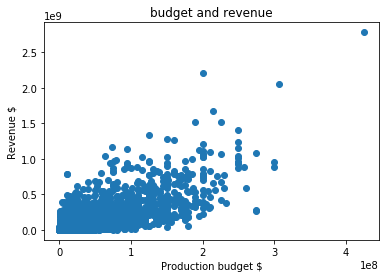

In [7]:
plt.scatter(X, y)
plt.title('budget and revenue')
plt.xlabel('Production budget $')
plt.ylabel('Revenue $')
plt.show()

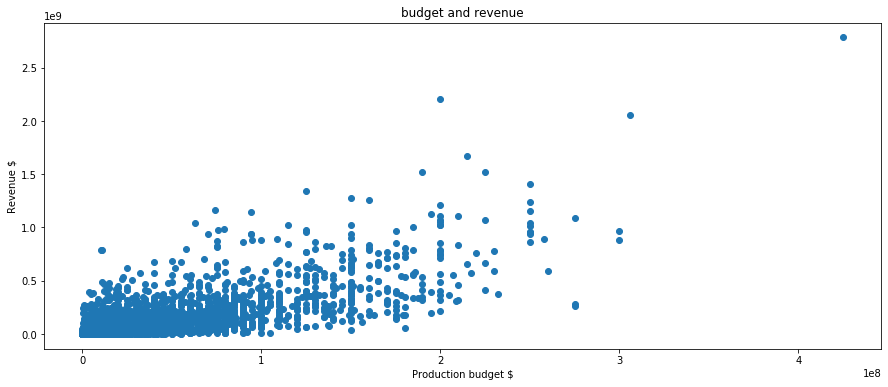

In [8]:
# specific the figure size x and y
plt.figure(figsize=(15, 6))
plt.scatter(X, y)
plt.title('budget and revenue')
plt.xlabel('Production budget $')
plt.ylabel('Revenue $')
plt.show()

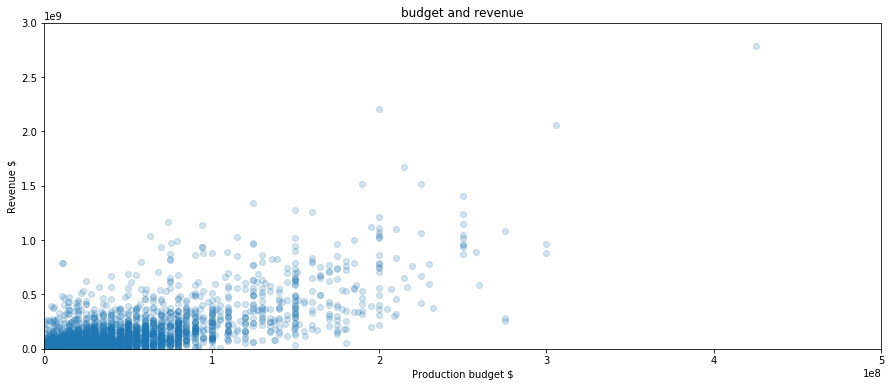

In [9]:
plt.figure(figsize=(15, 6))
# set the transparency for the dot
plt.scatter(X, y, alpha=0.2)
plt.title('budget and revenue')
plt.xlabel('Production budget $')
plt.ylabel('Revenue $')
# limit the value in the chart
plt.xlim(0, 500000000)
plt.ylim(0, 3000000000)
plt.show()

In [10]:
# จากกราฟด้านบนเราจะเห็นหนังที่ทำรายได้ได้สูงมากและใช้ต้นทุนสูงมากนั้นก็คือ avatar แล้วก็มีหนังที่ใช้ต้นทุนสูงมากแต่รายได้น้อยเช่นกัน
# แต่หนังส่วนใหญ่ต้นทุนจะอยู่ที่ 0-1

In [11]:
regression = LinearRegression()  # create the regression objects
regression.fit(X, y)  # fit(feature, target) or (independent var, dependent var) with both ttype is dataframe

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
regression.coef_  # get the slope coeffi >> theta1 >> if x is up 1, y will increase 3

array([[3.11150918]])

In [13]:
regression.intercept_  # get the intercepts >> theta2 >> if the budget is 0, it will loss 7.2M

array([-7236192.72913958])

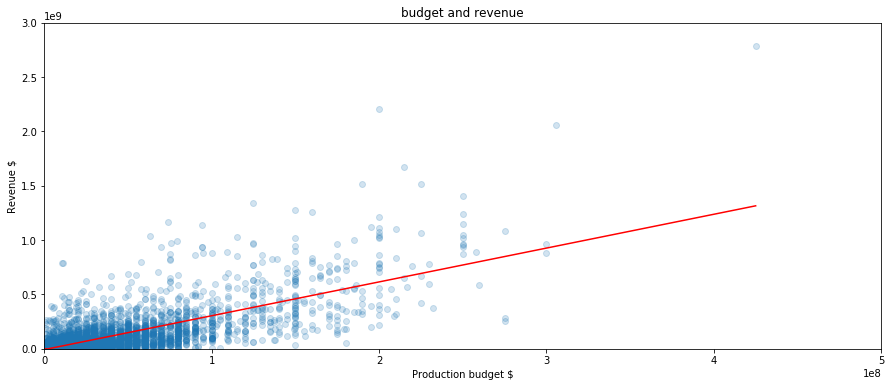

In [14]:
plt.figure(figsize=(15, 6))
plt.scatter(X, y, alpha=0.2)
# plot the line on the charts
# we have the regression line so if we input X the output is y, on regression line 
plt.plot(X, regression.predict(X), color='red')  # the y value is h-sub(theta) = (theta1)X + theta2; with throw the X as parameter

plt.title('budget and revenue')
plt.xlabel('Production budget $')
plt.ylabel('Revenue $')
plt.xlim(0, 500000000)
plt.ylim(0, 3000000000)
plt.show()

In [15]:
# conclude
'''
จาก theta2 ถ้าเราทำหนังด้วยเงินน้อยกว่า 7.2M เราจะเสียเงินไปเลย 7.2 ซึ่งนั้นก็จะดูแปลกๆไปหน่อย เพราะฉะนั้น model ของเราอาจจะไม่ได้ถูกต้อง 100% 
ลองไปดูหนังที่ได้กำไรสูงสุดเรื่อง avatar ก็ได้จะเห็นได้ว่าช่องว่างระหว่างเส้นไปถึงจุดนั้น เยอะมากกกก
ตอนนี้เราก็ได้สมการ h-sub(thata)(x) = 3.11x - 7236192
แล้วเราจะรู้ได้ไงว่าที่เราได้มามันถูกเท่าไหร ในที่นี้เราใช้สิ่งที่เรียกว่า r square >> r^2

ยิ่งไปกว่านั้นถ้า data ที่เอามา test ไม่ได้มาจากชุดที่ train หรือ ความสัมพันธ์นี้ไม่ใช่ linear หล่ะ หรือ ถ้าเราไปเพิ่ม data เข้าไปในชุด train หล่ะ
มันจะแม่นยำขึ้นไหม ไว้เรียนต่อนนาจา
'''

'\nจาก theta2 ถ้าเราทำหนังด้วยเงินน้อยกว่า 7.2M เราจะเสียเงินไปเลย 7.2 ซึ่งนั้นก็จะดูแปลกๆไปหน่อย เพราะฉะนั้น model ของเราอาจจะไม่ได้ถูกต้อง 100% \nลองไปดูหนังที่ได้กำไรสูงสุดเรื่อง avatar ก็ได้จะเห็นได้ว่าช่องว่างระหว่างเส้นไปถึงจุดนั้น เยอะมากกกก\nตอนนี้เราก็ได้สมการ h-sub(thata)(x) = 3.11x - 7236192\nแล้วเราจะรู้ได้ไงว่าที่เราได้มามันถูกเท่าไหร ในที่นี้เราใช้สิ่งที่เรียกว่า r square >> r^2\n\nยิ่งไปกว่านั้นถ้า data ที่เอามา test ไม่ได้มาจากชุดที่ train หรือ ความสัมพันธ์นี้ไม่ใช่ linear หล่ะ หรือ ถ้าเราไปเพิ่ม data เข้าไปในชุด train หล่ะ\nมันจะแม่นยำขึ้นไหม ไว้เรียนต่อนนาจา\n'

In [16]:
regression.score(X, y)  # amount of variation in flim revenue that is explained by flim budget

0.5496485356985729

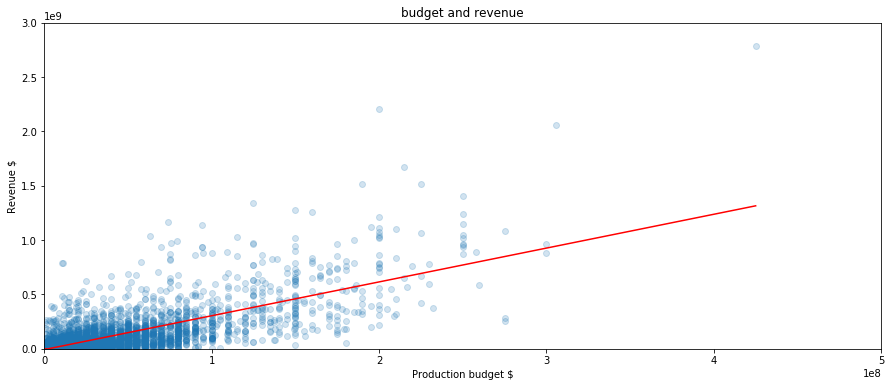

In [17]:
%matplotlib inline
# the graph won't show unless we run this code
# use %matplotlib inline to export the chart with it
plt.figure(figsize=(15, 6))
plt.scatter(X, y, alpha=0.2)
plt.plot(X, regression.predict(X), color='red') 
plt.title('budget and revenue')
plt.xlabel('Production budget $')
plt.ylabel('Revenue $')
plt.xlim(0, 500000000)
plt.ylim(0, 3000000000)
plt.show()